<a href="https://colab.research.google.com/github/mariabakhareva/compling/blob/lab3/%D0%9F%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

❗ Небольшая оговорка, которую необходимо сделать в самом начале: в зависимости от используемого вами алгоритма нужна разная предобработка. Так, например, если вы используете предобученную модель, изучите информацию о том, на каких данных её обучали. Если скормить предобработанные тексты модели, обучавшейся на сырых данных, или сырые данные модели, обучавшейся на предобработанных, результат будет значительно хуже.

Мы рассмотрим полный цикл классической предобработки, которая обычно используется в задачах статистического анализа текстовых данных и при обучении с нуля простых моделей (SVM, LogReg, NaiveBayes).

Итак, что же такое предобработка и зачем она нужна?

Сырые данные, собранные с просторов интернета, редко бывают в идеальном виде. Например, возьмем страничку с отзывом на ИТМО с сайта Табитуриент. Сырой html выглядит как множество тэгов, ссылок и текста.

Если мы хотим работать с данными, то сначала для удобства восприятия нам нужно привести их в желаемый формат.

In [ ]:
import requests

url = 'https://tabiturient.ru/sliv/n/?2242'
response = requests.get(url)
page = response.text
print(page)

<html>
<head>
<title>Отзыв о Санкт-Петербургский национальный исследовательский университет информационных технологий, механики и оптики - Мегафакультет компьютерных технологий и управления</title>
<meta name="description" content="Табитуриент: Типичный абитуриент">
<meta name="keywords" content="Табитуриент: Типичный абитуриент">
<meta name="copyright" lang="ru" content="Табитуриент: Типичный абитуриент">
<meta name="document-state" content="Dynamic">
<link rel="shortcut icon" href="https://tabiturient.ru/favicon.ico" type="image/x-icon">
<link rel="icon" href="https://tabiturient.ru/favicon.ico" type="image/x-icon">
<meta http-equiv="content-type" content="text/html; charset=utf-8">
<meta name="robots" content="index, follow">
<meta property="og:image" content="https://tabiturient.ru/logovuz/itmo.png"/><link href="https://tabiturient.ru/css/style.css?v-1-163" rel="stylesheet" type="text/css">
<script type="text/javascript" src="https://code.jquery.com/jquery-1.11.1.min.js"></script>


Первое, что можно сделать, чтобы облегчить себе жизнь - это использовать библиотеки для парсинга, например bs4. Beautiful Soup позволяет производить поиск по тэгам и доставать интересующую информацию.

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(page)
soup.find('div', {'class': 'font2'}).text

'\n\n\n\tПроучился в вузе 6 лет, закончил бакалавриат и магистратуру. Был сильно удивлён, когда знакомый абитуриент рассказывал, как в вузе все плохо, прислав в подтверждение ссылку на эту страницу.\n\tУчился на ПИиКТ (бывшее КТиУ). На первом и втором курсе, как и во многих вузах, была куча общеобразовательных предметов а ля матан, физика и тд. Сразу были курсы по программированию на шарпах, джавке и тд. Негодование вызывало преподавание гуманитарных предметов типа истории, риторики и тд. Нужно было строчить бесполезные рефераты и записывать лекции, хотя и по информатике встречались околобесполезные лабы в виде написать макросы для экселя. На третьем и четвертом было достаточно сильное углубление в специальность. Удалось потыкать множество языков программирования: Asm, C/C++, Java, Python. Была даже экзотика в виде Haskell (но это по желанию) и написания мини игры на языке программирования OpenGL для видеокарт. преподавались на неплохом уровне БД, были даже NoSQL решения. После того, к

В данном случае мы достали один-единственный отзыв, потому что изначальная ссылка вела на страницу с одним отзывом. Хотелось бы получить побольше. Если присмотреться, то можно заметить, что все ссылки на страницы с отзывами выглядят как https://tabiturient.ru/sliv/n/?номер. Чтобы достать с главной страницы все ссылки, подходящие под шаблон, можно воспользоваться регулярными выражениями.

In [ ]:
import re

url = 'https://tabiturient.ru/vuzu/itmo/'
response = requests.get(url)
page = response.text
review_urls = set(re.findall(r'https://tabiturient.ru/sliv/n/\?\d+', page))
print(review_urls)

{'https://tabiturient.ru/sliv/n/?4643', 'https://tabiturient.ru/sliv/n/?6346', 'https://tabiturient.ru/sliv/n/?3171', 'https://tabiturient.ru/sliv/n/?3998', 'https://tabiturient.ru/sliv/n/?2846', 'https://tabiturient.ru/sliv/n/?2938', 'https://tabiturient.ru/sliv/n/?2069', 'https://tabiturient.ru/sliv/n/?5453', 'https://tabiturient.ru/sliv/n/?4847', 'https://tabiturient.ru/sliv/n/?2242', 'https://tabiturient.ru/sliv/n/?2614', 'https://tabiturient.ru/sliv/n/?2508', 'https://tabiturient.ru/sliv/n/?3595', 'https://tabiturient.ru/sliv/n/?5222', 'https://tabiturient.ru/sliv/n/?2449', 'https://tabiturient.ru/sliv/n/?2596', 'https://tabiturient.ru/sliv/n/?4757', 'https://tabiturient.ru/sliv/n/?4144', 'https://tabiturient.ru/sliv/n/?3837', 'https://tabiturient.ru/sliv/n/?4580', 'https://tabiturient.ru/sliv/n/?2968', 'https://tabiturient.ru/sliv/n/?2520', 'https://tabiturient.ru/sliv/n/?2874', 'https://tabiturient.ru/sliv/n/?2061', 'https://tabiturient.ru/sliv/n/?2395'}


In [ ]:
reviews = []
for url in review_urls:
  response = requests.get(url)
  page = response.text
  soup = BeautifulSoup(page)
  review = soup.find('div', {'class': 'font2'}).text
  reviews.append(review)
print(reviews)

['\n\n\nЯ поступил в 2014, окончил в 2018.\nМой главный совет: Не идите вообще получать вышку. А если решили не выбирайте Бизнес-Информатику, вы потеряете 4 года своей жизни и огромную сумму денег, если будете учиться на платном. Всё время обучения было такое ощущение, что на факультете все заинтересованы не в качестве образования и компетентности преподавателей, а в том, чтобы те, кто учится на платном не уходили из универа, отчисляли людей неохотно и то, даже тех, кто хотел уйти по собственному не хотели отпускать.\n\nПо учебе: Тупые шутки преподов, отстающая программа обучения, одна вода, а не получение полезных знаний, в принципе учебу на БИ можно сравнить с марафоном Блиновской.\nРезультат обучения: 2% после выпуска пошли в магистратуру и работают сейчас в авито, ещё 18% пошли работать не по специальности, все остальные после окончания пошли на различные курсы, отучились несколько месяцев кто на тестировщиков, кто на другие айти позиции и собственно всё.\nСпрашивается ну и какой б

Сколько-то собрали.

In [ ]:
len(reviews)

25

# Регулярные выражения

Регулярные выражения (их еще называют regexp, или regex) - мощный инструмент для предобработки текстов. Они позволяют осуществлять поиск и замену по шаблону.

[Исчерпывающий гайд](https://habr.com/ru/articles/545150)

[Ещё гайд](https://habr.com/ru/articles/349860/)

[Сайт на потыкаться](https://regex101.com/)

Обсудим основы регулярных выражений. Они не зависят от языка программирования или приложения, которые используются.

Шаблоны, соответствующие одному символу.

<table>
<thead>
<tr>
<th>Шаблон</th>
<th>Описание</th>
<th>Пример</th>
<th>Применяем к тексту</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>.</code></td>
<td>Один любой символ, кроме новой строки <code>\n</code>.</td>
<td><code>м.л.ко</code></td>
<td><u><font color="#007d5b">молоко</font></u>, <u><font color="#007d5b">малако</font></u>, <br>
И<u><font color="#007d5b">м0л0ко</font></u>Ихлеб</td>
</tr>
<tr>
<td><code>\d</code></td>
<td>Любая цифра</td>
<td><code>СУ\d\d</code></td>
<td><u><font color="#007d5b">СУ35</font></u>, <u><font color="#007d5b">СУ11</font></u>1, АЛ<u><font color="#007d5b">СУ14</font></u></td>
</tr>
<tr>
<td><code>\D</code></td>
<td>Любой символ, кроме цифры</td>
<td><code>926\D123</code></td>
<td><u><font color="#007d5b">926)123</font></u>, 1<u><font color="#007d5b">926-123</font></u>4</td>
</tr>
<tr>
<td><code>\s</code></td>
<td>Любой пробельный символ (пробел, табуляция, конец строки и т.п.)</td>
<td><code>бор\sода</code></td>
<td><u><font color="#007d5b">бор ода</font></u>, <u><font color="#007d5b">бор<br>
ода</font></u>, борода</td>
</tr>
<tr>
<td><code>\S</code></td>
<td>Любой непробельный символ</td>
<td><code>\S123</code></td>
<td><u><font color="#007d5b">X123</font></u>, <u><font color="#007d5b">я123</font></u>, <u><font color="#007d5b">!123</font></u>456, 1 + 123456</td>
</tr>
<tr>
<td><code>\w</code></td>
<td>Любая буква (то, что может быть частью слова), а также цифры и <code>_</code></td>
<td><code>\w\w\w</code></td>
<td><u><font color="#007d5b">Год</font></u>, <u><font color="#007d5b">f_3</font></u>, <u><font color="#007d5b">qwe</font></u>rt</td>
</tr>
<tr>
<td><code>\W</code></td>
<td>Любая не-буква, не-цифра и не подчёркивание</td>
<td><code>сом\W</code></td>
<td><u><font color="#007d5b">сом!</font></u>, <u><font color="#007d5b">сом?</font></u> </td>
</tr>
<tr>
<td><code>[..]</code></td>
<td>Один из символов в скобках,<br>
а также любой символ из диапазона <code>a-b</code></td>
<td><code>[0-9][0-9A-Fa-f]</code></td>
<td><u><font color="#007d5b">12</font></u>, <u><font color="#007d5b">1F</font></u>, <u><font color="#007d5b">4B</font></u></td>
</tr>
<tr>
<td><code>[^..]</code></td>
<td>Любой символ, кроме перечисленных</td>
<td><code>&lt;[^&gt;]&gt;</code></td>
<td><u><font color="#007d5b">&lt;1&gt;</font></u>, <u><font color="#007d5b">&lt;a&gt;</font></u>, &lt;&gt;&gt;</td>
</tr>
<tr>
<td><code>\d≈[0-9], </code><br>
<code>\D≈[^0-9], </code><br>
<code>\w≈[0-9a-zA-Z </code><br>
<code>а-яА-ЯёЁ], </code><br>
<code>\s≈[ \f\n\r\t\v] </code></td>
<td>Буква “ё” не включается в общий диапазон букв!<br>
Вообще говоря, в <code>\d</code> включается всё, что в юникоде помечено как «цифра», а в <code>\w</code> — как буква. Ещё много всего!</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>[abc-], [-1]</code></td>
<td>если нужен минус, его нужно указать последним или первым</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>[*[(+\\\]\t]</code></td>
<td>внутри скобок нужно экранировать только <code>]</code> и <code>\</code></td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>\b</code></td>
<td>Начало или конец слова (слева пусто или не-буква, справа буква и наоборот).<br>
В отличие от предыдущих соответствует позиции, а не символу</td>
<td><code>\bвал</code></td>
<td><u><font color="#007d5b">вал</font></u>, перевал, Перевалка</td>
</tr>
<tr>
<td><code>\B</code></td>
<td>Не граница слова: либо и слева, и справа буквы,<br>
либо и слева, и справа НЕ буквы</td>
<td><code>\Bвал</code></td>
<td>пере<u><font color="#007d5b">вал</font></u>, вал, Пере<u><font color="#007d5b">вал</font></u>ка</td>
</tr>
</tbody>
</table>

Квантификаторы (количество повторений).

<table>
<thead>
<tr>
<th>Шаблон</th>
<th>Описание</th>
<th>Пример</th>
<th>Применяем к тексту</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>{n}</code></td>
<td>Ровно n повторений</td>
<td><code>\d{4}</code></td>
<td>1, 12, 123, <u><font color="#007d5b">1234</font></u>, 12345</td>
</tr>
<tr>
<td><code>{m,n}</code></td>
<td>От m до n повторений включительно</td>
<td><code>\d{2,4}</code></td>
<td>1, <u><font color="#007d5b">12</font></u>, <u><font color="#007d5b">123</font></u>, <u><font color="#007d5b">1234</font></u>, 12345</td>
</tr>
<tr>
<td><code>{m,}</code></td>
<td>Не менее m повторений</td>
<td><code>\d{3,}</code></td>
<td>1, 12, <u><font color="#007d5b">123</font></u>, <u><font color="#007d5b">1234</font></u>, <u><font color="#007d5b">12345</font></u></td>
</tr>
<tr>
<td><code>{,n}</code></td>
<td>Не более n повторений</td>
<td><code>\d{,2}</code></td>
<td><u><font color="#007d5b">1</font></u>, <u><font color="#007d5b">12</font></u>, <u><font color="#007d5b">12</font></u>3</td>
</tr>
<tr>
<td><code>?</code></td>
<td>Ноль или одно вхождение, синоним <code>{0,1}</code></td>
<td><code>валы?</code></td>
<td><u><font color="#007d5b">вал</font></u>, <u><font color="#007d5b">валы</font></u>, <u><font color="#007d5b">вал</font></u>ов</td>
</tr>
<tr>
<td><code>*</code></td>
<td>Ноль или более, синоним <code>{0,}</code></td>
<td><code>СУ\d*</code></td>
<td><u><font color="#007d5b">СУ</font></u>, <u><font color="#007d5b">СУ1</font></u>, <u><font color="#007d5b">СУ12</font></u>, ...</td>
</tr>
<tr>
<td><code>+</code></td>
<td>Одно или более, синоним <code>{1,}</code></td>
<td><code>a\)+</code></td>
<td><u><font color="#007d5b">a)</font></u>, <u><font color="#007d5b">a))</font></u>, <u><font color="#007d5b">a)))</font></u>, b<u><font color="#007d5b">a)</font></u>])</td>
</tr>
<tr>
<td><code>*?</code><br>
<code>+?</code><br>
<code>??</code><br>
<code>{m,n}?</code><br>
<code>{,n}?</code><br>
<code>{m,}?</code></td>
<td>По умолчанию квантификаторы <i>жадные</i> — <br>
захватывают максимально возможное число символов. <br>
Добавление <code>?</code> делает их <em>ленивыми</em>, <br>
они захватывают минимально возможное число символов</td>
<td><code>\(.*\)</code><br>
<code>\(.*?\)</code></td>
<td><u><font color="#007d5b">(a + b) * (c + d) * (e + f)</font></u><br>
<u><font color="#007d5b">(a + b)</font></u> * (c + d) * (e + f)</td>
</tr>
</tbody>
</table>

В Python для регулярных выражений существует встроенный модуль re. [Официальная документация](https://docs.python.org/3/library/re.html).

<table>
<thead>
<tr>
<th>Функция</th>
<th>Её смысл</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>re.search(pattern, string)</code></td>
<td>Найти в строке <code>string</code> первую строчку, подходящую под шаблон <code>pattern</code>;</td>
</tr>
<tr>
<td><code>re.fullmatch(pattern, string)</code></td>
<td>Проверить, подходит ли строка <code>string</code> под шаблон <code>pattern</code>;</td>
</tr>
<tr>
<td><code>re.split(pattern, string, maxsplit=0)</code></td>
<td>Аналог <code>str.split()</code>, только разделение происходит по подстрокам, подходящим под шаблон <code>pattern</code>;</td>
</tr>
<tr>
<td><code>re.findall(pattern, string)</code></td>
<td>Найти в строке <code>string</code> все непересекающиеся шаблоны <code>pattern</code>;</td>
</tr>
<tr>
<td><code>re.finditer(pattern, string)</code></td>
<td>Итератор всем непересекающимся шаблонам <code>pattern</code> в строке <code>string</code> (выдаются <code>match</code>-объекты);</td>
</tr>
<tr>
<td><code>re.sub(pattern, repl, string, count=0)</code></td>
<td>Заменить в строке <code>string</code> все непересекающиеся шаблоны <code>pattern</code> на <code>repl</code>; </td>
</tr>
<tr>
<td><code>re.compile(pattern)</code></td>
<td>Позволяет представить шаблон в виде объекта <code>re</code> и вызывать методы уже непосредственно для него</td>
</tr>
</tbody>
</table>

`re.search()` ищет только первое вхождение, поэтому его удобно использовать для проверки, есть ли интересующуее слово в тексте.

In [ ]:
jumbled_reviews = ' '.join(reviews)
re.search('ИКТ', jumbled_reviews)  # есть

<re.Match object; span=(49842, 49845), match='ИКТ'>

In [ ]:
re.search('ИТГС', jumbled_reviews)  # нет

Проверка соответствия. `re.match()` проверяет на соответствие шаблону с начала строки, `re.fullmatch()` проверяет на соответствие шаблону всей строки.

In [ ]:
phone_number = "+7 (123) 456-78-90, причем не важно, что в конце строки, если в regex не указан якорь"
re.match(r'^\+\d{1,3} \(\d{3}\) \d{3}-\d{2}-\d{2}', phone_number)

<re.Match object; span=(0, 18), match='+7 (123) 456-78-90'>

In [ ]:
email = "поchта@example.com"
match_ = re.fullmatch(r'^[а-яА-Яa-zA-Z0-9_.+-]+@[а-яА-Яa-zA-Z0-9-]+\.[а-яА-Яa-zA-Z0-9-.]+$', email)
match_.group()  # так можно достать сам текст соответствия

'поchта@example.com'

`re.split()` очень часто используется для разбиения текста на составные части, если заранее известна структура текста.

In [ ]:
address = "г.Санкт-Петербург, набережная канала Грибоедова, дом 74, литера Д"
city, street, home, *litera = re.split(r', ', address)  # литеры может и не быть
print(city, street, home, litera)

address = "город Петергоф, Санкт-Петербургский проспект, дом 60"
city, street, home, *litera = re.split(r', ', address)
print(city, street, home, litera)

г.Санкт-Петербург набережная канала Грибоедова дом 74 ['литера Д']
город Петергоф Санкт-Петербургский проспект дом 60 []


`re.findall()` и `re.finditer()` работают одинаково, только вторая функция возвращает итератор. Важно: они обе ищут только непересекающиеся последовательности.

In [ ]:
print(re.findall(r'магистр[а-я]+', jumbled_reviews))

['магистратуру', 'магистратура', 'магистратуры', 'магистратуру', 'магистратуре', 'магистратуре', 'магистрантами', 'магистратуру', 'магистры', 'магистров', 'магистра', 'магистратуры', 'магистратуру', 'магистратуре', 'магистратура', 'магистратуры', 'магистратуре']


`re.sub()` - самая важная и часто используемая для предобработки текста функция.

In [ ]:
init_text = 'Hello, в смысле Привет!Как дела7'
text1 = re.sub(r'[^А-Яа-яёЁ ]', ' ', init_text)  # убрать все не русскоязычные символы. не используйте замену на пустую строку, иначе рискуете получить слипшиеся символы!
print(text1)

text2 = re.sub(r'\s+', ' ', text1)  # заменить последовательности пробелов на один пробел
print(text2)

       в смысле Привет Как дела 
 в смысле Привет Как дела 


`re.complie()` удобно использовать, когда нужно найти один и тот же шаблон в разных текстах.

In [ ]:
pattern = re.compile('\W(скамт[а-я]+)', re.IGNORECASE)
for review in reviews:
  if pattern.search(review):
    print(review.strip())
    print('\n\n')

Этот пост не только, но в основном, для неприякаянных студенческих душ, которые болееют, по-настоящему болеют наукой, классическими фундаментальными ЧЕСТНЫМИ и невероятно прекрасными логичными научными исследованиями. 

Речь пойдет про биологическое направление, тк именно к нему я имею отношение.

Начну с того, что речь пойдет не про то, как сложно найти действительно стоящую программу обучения в России после бакалавриата, если ты хочешь двигаться в научке. Речь пойдет о том, как НЕ попасть в те учреждения, кафедры, чтобы не проспать свои два прекрасных года магистратуры, а то и все три, если речь идет об аспирантуре (господи, не дай бог просрать свою аспирантуру в таких местах). 

К сожалению, фасадных обучающих учреждений очень много. А факультетов еще больше. За прекрасной картинкой умно выстроенного менеждемента и пиара в 18-25 лет сложно определить, что перед тобой — ВУЗ, который хочет тебя научить и принести жертве науке еще одного прекрасного студента или это недонаучное-недообу

Дополнительные флаги

<table>
<thead>
<tr>
<th>Константа</th>
<th>Её смысл</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>re.ASCII</code></td>
<td>По умолчанию <code>\w</code>, <code>\W</code>, <code>\b</code>, <code>\B</code>, <code>\d</code>, <code>\D</code>, <code>\s</code>, <code>\S</code> соответствуют <br>
  все юникодные символы с соответствующим качеством. <br>
 Например, <code>\d</code> соответствуют не только арабские цифры, <br>
 но и вот такие: ٠١٢٣٤٥٦٧٨٩. <br>
 <code>re.ASCII</code> ускоряет работу, <br>
 если все соответствия лежат внутри ASCII.</td>
</tr>
<tr>
<td><nobr><code>re.IGNORECASE</code></nobr></td>
<td>Не различать заглавные и маленькие буквы. <br>
 Работает медленнее, но иногда удобно</td>
</tr>
<tr>
<td><code>re.MULTILINE</code></td>
<td>Специальные символы <code>^</code> и <code>$</code> соответствуют <br>
 началу и концу каждой строки</td>
</tr>
<tr>
<td><code>re.DOTALL</code></td>
<td>По умолчанию символ <code>\n</code> конца строки не подходит под точку. <br>
 С этим флагом точка — вообще любой символ</td>
</tr>
</tbody>
</table>

Иногда хочется найти не всё соответствие целиком, а только его часть. На помощь приходит группировка.

In [ ]:
html = """<h1>Какой-то текст, <b>выделенный жирным, в заголовке</b></h1>
<p>Какой-то текст, <b>выделенный жирным, в абзаце</b></p>"""

matches = re.findall(r'<p>.*<b>(.*?)</b>.*</p>', html)
if matches:
    for match_ in matches:
        print(match_)

выделенный жирным, в абзаце


In [ ]:
date_string = "Сегодня 25.09.2023"
print(re.findall(r'(\d{2})\.(\d{2})\.(\d{4})', date_string))
print(re.findall(r'(?:\d{2})\.(?:\d{2})\.(?:\d{2}(\d{2}))', date_string))  # не всегда нас интересуют все найденные группы

[('25', '09', '2023')]
['23']


К найденным группам можно обращаться внутри самого выражения. Это удобно использовать для замен.

In [ ]:
text = "Мы приедем 09/20/2023. Так что приходи не раньше 09/22/2023 :/"
re.sub(r'(\d{2})/(\d{2})/(\d{4})', r'\2.\1.\3', text)

'Мы приедем 20.09.2023. Так что приходи не раньше 22.09.2023 :/'

Ещё немного того, о чем стоит знать, но что вряд ли пригодится в повседневной жизни.

<table>
<thead>
<tr>
<th>Шаблон</th>
<th>Описание</th>
<th>Пример</th>
<th>Применяем к тексту</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>(?=...)</code></td>
<td><em>lookahead assertion</em>, соответствует каждой <br>
 позиции, сразу после которой начинается <br>
соответствие шаблону ...</td>
<td><code>Isaac (?=Asimov)</code></td>
<td><u><font color="#007d5b">Isaac </font></u>Asimov, Isaac other</td>
</tr>
<tr>
<td><code>(?!...)</code></td>
<td><em>negative lookahead assertion</em>, соответствует <br>
каждой позиции, сразу после которой <br>
НЕ может начинаться шаблон ...</td>
<td><code>Isaac (?!Asimov)</code></td>
<td>Isaac Asimov, <u><font color="#007d5b">Isaac </font></u>other</td>
</tr>
<tr>
<td><code>(?&lt;=...)</code></td>
<td><em>positive lookbehind assertion</em>, соответствует <br>
каждой позиции, которой может заканчиваться шаблон ...<br>
Длина шаблона должна быть фиксированной, <br>
то есть <code>abc</code> и <code>a|b</code> — это ОК, а <code>a*</code> и <code>a{2,3}</code> — нет.</td>
<td><code>(?&lt;=abc)def</code></td>
<td>abc<u><font color="#007d5b">def</font></u>, bcdef</td>
</tr>
<tr>
<td><nobr><code>(?&lt;!...)</code></nobr></td>
<td><em>negative lookbehind assertion</em>, соответствует <br>
каждой позиции, которой НЕ может <br>
заканчиваться шаблон ...</td>
<td><code>(?&lt;!abc)def</code></td>
<td>abcdef, bc<u><font color="#007d5b">def</font></u></td>
</tr>
</tbody>
</table>

В pandas также присутствует поддержка регулярных выражений, что может быть удобно при работе с таблицами, содержащими текстовые данные.

In [ ]:
import pandas as pd

reviews_series = pd.DataFrame(reviews, columns=['text'])

In [ ]:
reviews_series[reviews_series['text'].str.contains(r'бакалавр')]

,text
2,\n\n\nЯ закончила 1 курс \nфакультета лазерной...
7,\n\n\nЗа 6 лет обучения(бакалавриат+магистрату...
9,"\n\n\n\tПроучился в вузе 6 лет, закончил бакал..."
13,"\n\n\nПоступил я в этот ""прекрасный"" ВУЗ в 201..."
14,\n\n\nРаботаю в ИТМО с 2007 года. Любопытно ка...
16,\n\n\nДаже не знаю что нового рассказывать об ...
18,\n\n\nЯ - студент-бакалавр 2го курса Робототех...
19,"\n\n\nЭтот пост не только, но в основном, для ..."


In [ ]:
reviews_series['text'].str.extract(r'(\d{4})').dropna()

,0
1,2014
2,2019
5,1005
7,2008
9,5300
11,2016
13,2018
14,2007
17,2020
18,2019


In [ ]:
reviews_series['text'].str.findall(r'(?:у|)лучш[а-я]+')

0                              []
1                              []
2                              []
3                              []
4          [лучшем, лучше, лучше]
5                              []
6                              []
7           [лучше, лучше, лучше]
8                              []
9                              []
10                             []
11                        [лучше]
12                       [лучшее]
13                [лучших, лучше]
14                       [лучшее]
15                             []
16               [лучшие, лучший]
17                             []
18                             []
19                       [лучшую]
20                             []
21                             []
22                      [лучшего]
23                             []
24    [лучший, улучшения, лучшую]
Name: text, dtype: object

Задание: с помощью регулярных выражений выполнить [задачу на сайте](https://acmp.ru/index.asp?main=task&id_task=870).

# Очистка текстов. Нормализация

Для последующей работы возьмем тексты из ВКонтакте, собранные для задачи классификации новостей.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
vk_df = pd.read_csv('/content/drive/MyDrive/Work/NLP 23 24/data/vk_data.csv').dropna()
vk_df.sample(5)

,text,category,is_ad
7813,Мысли за дневным капучино: Уоррен Баффетт что-...,Финансы,0
628,я могу до ручки\nдовести сама\nгде у вас довод...,Развлечения и юмор,0
169,"наплевать на твой знак зодиака, лучше скажи, к...",Блоги,0
605,не купив ответы\nна экзамен прусь\nкак тебе та...,Развлечения и юмор,0
8462,"«В некоторых распятый бог», 2015.",Другое,0


In [ ]:
vk_df.category.value_counts()

Образование и познавательное    300
Развлечения и юмор              300
Финансы                         300
Маркетинг, PR, реклама          300
Музыка                          300
Софт и приложения               299
Технологии                      299
Бизнес и стартапы               299
Шоубиз                          297
Рукоделие                       297
Блоги                           297
Другое                          297
Право                           295
Видео и фильмы                  295
Новости и СМИ                   294
Искусство                       294
Экономика                       294
Путешествия                     291
Игры                            286
Здоровье и медицина             283
Картинки и фото                 277
Мода и красота                  269
Цитаты                          269
Еда и кулинария                 254
Дизайн                          230
Политика                        207
Психология                      193
Спорт                       

Установим [библиотеку](https://jcharis.github.io/neattext/), содержащую готовые шаблоны для предобработки. Важно: изначально библиотека рассчитана на работу с английским, поэтому "доверяй, но проверяй".

In [ ]:
%%capture
!pip install neattext

In [ ]:
import neattext as nt
import neattext.functions as nfx

test = vk_df.sample().text.tolist()[0]
print(test)

Подборка временно бесплатных игр и приложений на Android 
 
1. Merge Monster VIP (https://play.google.com/store/apps/details?id=com.eastmoon.mergemonvip) - головоломка; 
2. King of Defense Premium (https://play.google.com/store/apps/details?id=com.gcenter.kingofdefense.merge.tower.td&hl=en) - стратегия; 
3. Sword Knights (https://play.google.com/store/apps/details?id=com.honeydew.stealerpremium&hl=en) - ролевая игра; 
4. Tap Town Premium (https://play.google.com/store/apps/details?id=com.honeydew.vip.herostores&hl=en) - ролеплей RPG.


Найдите отличие и предположите, в чём причина.

In [ ]:
nfx.clean_text(test,
               puncts=False,
               stopwords=False,
               urls=True,
               emails=True,
               numbers=True,
               emojis=True,
               special_char=False,
               phone_num=True,
               non_ascii=False,
               multiple_whitespaces=True,
               contractions=True,
               currency_symbols=True,
               custom_pattern=None)

'подборка временно бесплатных игр и приложений на android . merge monster vip () - головоломка; . king of defense premium () - стратегия; . sword knights () - ролевая игра; . tap town premium () - ролеплей rpg.'

In [ ]:
nfx.clean_text(test,
               puncts=True,  # единственное, что поменялось относительно предыдущей ячейки
               stopwords=False,
               urls=True,
               emails=True,
               numbers=True,
               emojis=True,
               special_char=False,
               phone_num=True,
               non_ascii=False,
               multiple_whitespaces=True,
               contractions=True,
               currency_symbols=True,
               custom_pattern=None)

'подборка временно бесплатных игр и приложений на android merge monster vip (https://playgooglecom/store/apps/detailsid=comeastmoonmergemonvip) головоломка king of defense premium (https://playgooglecom/store/apps/detailsid=comgcenterkingofdefensemergetowertdhl=en) стратегия sword knights (https://playgooglecom/store/apps/detailsid=comhoneydewstealerpremiumhl=en) ролевая игра tap town premium (https://playgooglecom/store/apps/detailsid=comhoneydewvipherostoreshl=en) ролеплей rpg'

Альтернативный способ сделать то же самое, но здесь вы сами отвечаете за порядок выполнения операций.

In [ ]:
docx = nt.TextFrame(test)
docx.remove_emojis().remove_urls().remove_emails().remove_html_tags().remove_numbers().remove_puncts().remove_stopwords(lang='ru').fix_contractions()

'подборка временно бесплатных игр приложений android merge monster vip () головоломка king of defense premium () стратегия sword knights () ролевая игра tap town premium () ролеплей rpg'

Можно и нужно добавлять свои шаги предобработки.

In [ ]:
def preprocess_text(text):
  docx = nt.TextFrame(text)
  preprocessed = docx.remove_emojis().remove_urls().remove_emails().remove_html_tags().fix_contractions()
  preprocessed = re.sub(r'[^а-яёa-z ]', ' ', preprocessed)  # оставляем только буквенные символы. обратите внимание, что 'ё' нужно указывать отдельно
  preprocessed = re.sub(r'\s+', ' ', preprocessed)  # убираем лишние пробелы
  return preprocessed.strip()

In [ ]:
preprocess_text(test)

'подборка временно бесплатных игр и приложений на android merge monster vip головоломка king of defense premium стратегия sword knights ролевая игра tap town premium ролеплей rpg'

In [ ]:
vk_df['preprocessed'] = vk_df['text'].apply(preprocess_text)
vk_df.sample(5)

,text,category,is_ad,preprocessed
3171,"Похоже, сотрудники российского посольства в Пх...",Политика,0,похоже сотрудники российского посольства в пхе...
2740,"Мужчина, фантазирующий о том, что жена бросает...",Психология,0,мужчина фантазирующий о том что жена бросает е...
1071,🧨 - 33% на все!\n\nДо конца июля вы можете при...,Технологии,0,на все до конца июля вы можете приобрести курс...
3133,"Граффити для новичков: приемы, техники и теори...",Дизайн,0,граффити для новичков приемы техники и теория ...
3987,"Пункт 10 Порядка оказания скорой, в том числе ...",Право,0,пункт порядка оказания скорой в том числе скор...


Ну и куда же мы без jff секции...

In [ ]:
'CУПEPHOBИHKA'.lower()

'cупephobиhka'

In [ ]:
from neattext.explainer import emojify, emoji_explainer

emoji_explainer('🤡'), emojify('V')

('CLOWN_FACE', '✌️')

# Токенизация и сегментация

Токенизация — процесс разбиения текстового документа на отдельные слова, которые называются токенами.

И это далеко не простой процесс, так как достаточно сложно дать определение, что же такое слово. Пожалуй, классический пример проблемы токенизациии. Вот где в данном тексте слова?

In [ ]:
text = '''
Продаётся LADA 4x4. ПТС 01.12.2018, куплена 20 января 19 года, 10 000 км пробега.
Комплектация полная. Новая в салоне 750 000, отдам за 650 000.
Возможен обмен на ВАЗ-2110 или ВАЗ 2109 с вашей доплатой.
Краснодар, ул. Миклухо-Маклая, д. 4/5, подьезд 1
Тел. 8(999)1234567, 8 903 987-65-43, +7 (351) 111 22 33
И.И. Иванов (Иван Иванович)
'''

print(text.split())  # самая простая токенизация - разбиение по пробелам

['Продаётся', 'LADA', '4x4.', 'ПТС', '01.12.2018,', 'куплена', '20', 'января', '19', 'года,', '10', '000', 'км', 'пробега.', 'Комплектация', 'полная.', 'Новая', 'в', 'салоне', '750', '000,', 'отдам', 'за', '650', '000.', 'Возможен', 'обмен', 'на', 'ВАЗ-2110', 'или', 'ВАЗ', '2109', 'с', 'вашей', 'доплатой.', 'Краснодар,', 'ул.', 'Миклухо-Маклая,', 'д.', '4/5,', 'подьезд', '1', 'Тел.', '8(999)1234567,', '8', '903', '987-65-43,', '+7', '(351)', '111', '22', '33', 'И.И.', 'Иванов', '(Иван', 'Иванович)']


Нужно различать уникальные слова (типы) и токены. Токен = уникальное слово + его позиция в тексте.

Самый большой набор токенизаторов есть в [библиотеке nltk](https://www.nltk.org/). Их там 19 штук. Вот достаточно [подробный обзор](https://vc.ru/newtechaudit/309131-obzor-tokenizatorov-vhodyashchih-v-sostav-biblioteki-nltk). Любой подобный токенизатор можно написать самостоятельно с помощью регулярных выражений.

In [ ]:
%%capture
import nltk
from nltk.tokenize import word_tokenize, ToktokTokenizer

nltk.download('punkt')

In [ ]:
print(word_tokenize(text))

['Продаётся', 'LADA', '4x4', '.', 'ПТС', '01.12.2018', ',', 'куплена', '20', 'января', '19', 'года', ',', '10', '000', 'км', 'пробега', '.', 'Комплектация', 'полная', '.', 'Новая', 'в', 'салоне', '750', '000', ',', 'отдам', 'за', '650', '000', '.', 'Возможен', 'обмен', 'на', 'ВАЗ-2110', 'или', 'ВАЗ', '2109', 'с', 'вашей', 'доплатой', '.', 'Краснодар', ',', 'ул', '.', 'Миклухо-Маклая', ',', 'д', '.', '4/5', ',', 'подьезд', '1', 'Тел', '.', '8', '(', '999', ')', '1234567', ',', '8', '903', '987-65-43', ',', '+7', '(', '351', ')', '111', '22', '33', 'И.И', '.', 'Иванов', '(', 'Иван', 'Иванович', ')']


Рассмотрим ещё один токенизатор из [библиотеки natasha](https://github.com/natasha/natasha). Эта библиотека и её составляющие, наверное, самый частый инструмент, который вам доведется использовать при обработке русскоязычных текстов.

In [ ]:
%%capture
!pip install natasha

In [ ]:
from razdel import tokenize  # razdel - часть библиотеки natasha

print([item.text for item in tokenize(text)])

['Продаётся', 'LADA', '4', 'x', '4', '.', 'ПТС', '01.12.2018', ',', 'куплена', '20', 'января', '19', 'года', ',', '10', '000', 'км', 'пробега', '.', 'Комплектация', 'полная', '.', 'Новая', 'в', 'салоне', '750', '000', ',', 'отдам', 'за', '650', '000', '.', 'Возможен', 'обмен', 'на', 'ВАЗ-2110', 'или', 'ВАЗ', '2109', 'с', 'вашей', 'доплатой', '.', 'Краснодар', ',', 'ул', '.', 'Миклухо-Маклая', ',', 'д', '.', '4/5', ',', 'подьезд', '1', 'Тел', '.', '8', '(', '999', ')', '1234567,', '8', '903', '987-65-43', ',', '+', '7', '(', '351', ')', '111', '22', '33', 'И', '.', 'И', '.', 'Иванов', '(', 'Иван', 'Иванович', ')']


Сегментация похожа на токенизацию, но вместо слов мы выделяем предложения. Казалось бы, всё просто - нужно разбить по знакам пунктуации (?!.). Но всегда ли подобное разбиение позволит добиться желаемого? Приведите хотя бы три примера, когда перечисленные знаки препинания не являются концами предложения.

In [ ]:
from nltk.tokenize import sent_tokenize

sent_tokenize(text)

['\nПродаётся LADA 4x4.',
 'ПТС 01.12.2018, куплена 20 января 19 года, 10 000 км пробега.',
 'Комплектация полная.',
 'Новая в салоне 750 000, отдам за 650 000.',
 'Возможен обмен на ВАЗ-2110 или ВАЗ 2109 с вашей доплатой.',
 'Краснодар, ул.',
 'Миклухо-Маклая, д.',
 '4/5, подьезд 1\nТел.',
 '8(999)1234567, 8 903 987-65-43, +7 (351) 111 22 33\nИ.И.',
 'Иванов (Иван Иванович)']

In [ ]:
%%capture
!pip install rusenttokenize

In [ ]:
from rusenttokenize import ru_sent_tokenize

ru_sent_tokenize(text)

['Продаётся LADA 4x4.',
 'ПТС 01.12.2018, куплена 20 января 19 года, 10 000 км пробега.',
 'Комплектация полная.',
 'Новая в салоне 750 000, отдам за 650 000.',
 'Возможен обмен на ВАЗ-2110 или ВАЗ 2109 с вашей доплатой.',
 'Краснодар, ул. Миклухо-Маклая, д. 4/5, подьезд 1\nТел. 8(999)1234567, 8 903 987-65-43, +7 (351) 111 22 33\nИ.И. Иванов (Иван Иванович)']

In [ ]:
%%time
_ = vk_df.text.apply(lambda text: ru_sent_tokenize(text))

CPU times: user 8.57 s, sys: 32.2 ms, total: 8.6 s
Wall time: 25.6 s


In [ ]:
from razdel import sentenize

[item.text for item in sentenize(text)]

['Продаётся LADA 4x4.',
 'ПТС 01.12.2018, куплена 20 января 19 года, 10 000 км пробега.',
 'Комплектация полная.',
 'Новая в салоне 750 000, отдам за 650 000.',
 'Возможен обмен на ВАЗ-2110 или ВАЗ 2109 с вашей доплатой.',
 'Краснодар, ул. Миклухо-Маклая, д. 4/5, подьезд 1\nТел. 8(999)1234567, 8 903 987-65-43, +7 (351) 111 22 33\nИ.И. Иванов (Иван Иванович)']

In [ ]:
%%time
_ = vk_df.text.apply(lambda text: sentenize(text))

CPU times: user 210 ms, sys: 13.1 ms, total: 224 ms
Wall time: 297 ms


# Стемминг

И стемминг, и лемматизация используются для уменьшения вариативности в данных. Условно, с точки зрения смысла, "корова", "корову" и "корове" - это одни и те же слова, так как речь идет о животном. Обе тактики позволяют привести слова к одному виду. Наглядно о разнице:

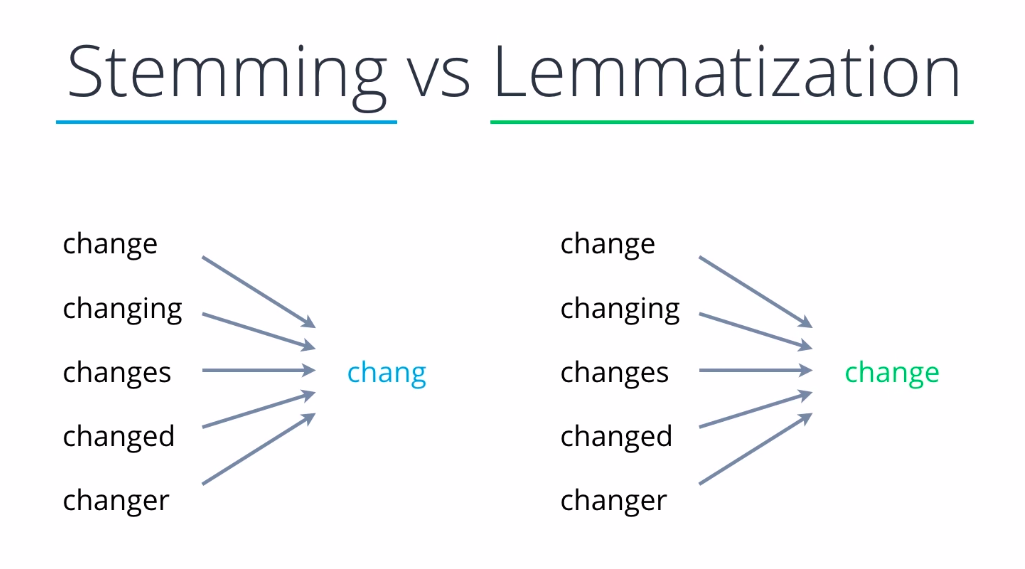

Стемминг представляет собой отсечение от слова окончаний и суффиксов, чтобы оставшаяся часть, называемая stem, была одинаковой для всех грамматических форм слова. Стем необязательно совпадает с морфлогической основой слова. Одинаковый стем может получиться и не у однокоренных слов и наоборот — в этом проблема стемминга.

1-ый вид ошибки: белый, белка, белье
 бел

2-ой вид ошибки: трудность, трудный
 трудност, труд

3-ий вид ошибки: быстрый, быстрее
 быст, побыстрее
 побыст

Стемминг хорошо работает для английского языка и плохо - для русского. Однако в любом случае его неоспоримым преимуществом является скорость работы.

In [ ]:
from nltk.stem.snowball import SnowballStemmer


snowball = SnowballStemmer("russian")
text = vk_df.preprocessed.sample().tolist()[0]
print(text)
print()

print("{0:20}{1:20}".format("--Word--","--Stem--"))
for word in [item.text for item in tokenize(text)]:
   print ("{0:20}{1:20}".format(word, snowball.stem(word)))

proapk adguard обновление безопасность блокировка конфиденциальность обновление от версия adguard это лучший выбор для защиты от вредоносных программ и избавления от навязчивой рекламы это единственный в своём роде интернет фильтр который защищает вас от вездесущей рекламы вредоносных и фишинговых сайтов онлайн трекинга и многого другого adguard действительно справится с блокировкой абсолютно всех видов интернет рекламы ускорит загрузку страниц сэкономит трафик и повысит защиту вашего устройства от возможных угроз adguard использует уникальную технологию позволяющую фильтровать трафик вашего устройства для которой не требуются root права скорость работы фильтрации не будет зависеть от работы vpn сервера так как он размещается прямо на вашем устройстве внимание публичные беспроводные точки доступа в сеть интернет не разрешают работу adguard и как следствие приложение вероятнее всего не будет блокировать рекламу рекомендуемый объём озу оперативной памяти у вашего устройства от гб мод pre

In [ ]:
text = preprocess_text("""Stemming algorithms attempt to find the common base roots of various inflections
by cutting off the endings or beginnings of the word. The chop is based on a list of common
prefixes and suffixes that can typically be found in inflected words. This non-discriminatory
nature act of chopping words may occasionally lead to finding meaningful word stems, but
other times it does not.""")

snowball = SnowballStemmer("english")
print("{0:20}{1:20}".format("--Word--","--Stem--"))
for word in [item.text for item in tokenize(text)]:
   print ("{0:20}{1:20}".format(word, snowball.stem(word)))

--Word--            --Stem--            
stemming            stem                
algorithms          algorithm           
attempt             attempt             
to                  to                  
find                find                
the                 the                 
common              common              
base                base                
roots               root                
of                  of                  
various             various             
inflections         inflect             
by                  by                  
cutting             cut                 
off                 off                 
the                 the                 
endings             end                 
or                  or                  
beginnings          begin               
of                  of                  
the                 the                 
word                word                
the                 the                 
chop            

# Лемматизация

Лемматизация — это процесс приведения словоформы к лемме, то есть нормальной (словарной) форме.

Было бы странно рассматривать лемматизацию в отрыве от частеречной разметки, поэтому сначала остановимся на задаче POS-tagging (part of speech tagging).

Частеречная разметка, или POS-tagging (part of speech tagging) — определение части речи и грамматических характеристик слов в тексте (корпусе) с приписыванием им соответствующих тегов.

Для большинства слов возможно несколько разборов (несколько разных лемм, несколько разных частей речи и т.п.). Тэггер генерирует все варианты, ранжирует их по вероятности и выдает наиболее вероятный. Выбор одного разбора из нескольких называется снятием омонимии, или дизамбигуацией.

Существует множество наборов грамматических тегов:
* OpenCorpora
* Диалог-2010
* НКРЯ
* Universal Dependencies

Для русского языка существует [библиотка russian-tagsets](https://pypi.org/project/russian-tagsets/), позволяющая конвертировать одни теги в другие.

На данный момент стандартом является Universal Dependencies. Список основных тегов UD:

* ADJ: adjective
* ADP: adposition
* ADV: adverb
* AUX: auxiliary
* CCONJ: coordinating conjunction
* DET: determiner
* INTJ: interjection
* NOUN: noun
* NUM: numeral
* PART: particle
* PRON: pronoun
* PROPN: proper noun
* PUNCT: punctuation
* SCONJ: subordinating conjunction
* SYM: symbol
* VERB: verb
* X: other

Существует несколько библиотек для морфологического анализа русскоязычных текстов, а именно `pymystem3`, `pymorphy2`, `natasha` (использует под капотом `pymorphy2`), `spacy` и другие. Для русского языка лучше всего подходит `pymystem3`, так как его методы принимают на вход не единичное слово, а текст, и при определении словоформы учитывается контекст.

Посмотрим пару примеров для английского и русского.

In [ ]:
%%capture
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

In [ ]:
from textblob import TextBlob, Word

text = """"Dialogue" is an international conference on computational linguistics with a 40-years history.
Today it is de facto the world’s leading international forum on problems and methods of computational
analysis of the Russian language in a typological perspective. The Dialogue community (regular authors, reviewers)
includes more than 200 researchers working around the world, united by the idea of interaction between theoretical
linguistics and applied technologies, in particular - Deep Learning.
"""
textblob = TextBlob(text)
print(textblob.tags)  # POS-tagging

[('Dialogue', 'NN'), ('is', 'VBZ'), ('an', 'DT'), ('international', 'JJ'), ('conference', 'NN'), ('on', 'IN'), ('computational', 'JJ'), ('linguistics', 'NNS'), ('with', 'IN'), ('a', 'DT'), ('40-years', 'JJ'), ('history', 'NN'), ('Today', 'NN'), ('it', 'PRP'), ('is', 'VBZ'), ('de', 'JJ'), ('facto', 'FW'), ('the', 'DT'), ('world', 'NN'), ('’', 'NN'), ('s', 'NN'), ('leading', 'VBG'), ('international', 'JJ'), ('forum', 'NN'), ('on', 'IN'), ('problems', 'NNS'), ('and', 'CC'), ('methods', 'NNS'), ('of', 'IN'), ('computational', 'JJ'), ('analysis', 'NN'), ('of', 'IN'), ('the', 'DT'), ('Russian', 'JJ'), ('language', 'NN'), ('in', 'IN'), ('a', 'DT'), ('typological', 'JJ'), ('perspective', 'NN'), ('The', 'DT'), ('Dialogue', 'NNP'), ('community', 'NN'), ('regular', 'JJ'), ('authors', 'NNS'), ('reviewers', 'NNS'), ('includes', 'VBZ'), ('more', 'JJR'), ('than', 'IN'), ('200', 'CD'), ('researchers', 'NNS'), ('working', 'VBG'), ('around', 'IN'), ('the', 'DT'), ('world', 'NN'), ('united', 'VBN'), ('by

In [ ]:
w = Word("technologies")
w.lemmatize()  # lemmatization

'technology'

In [ ]:
%%capture
!python -m spacy download en_core_web_sm

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
for token in doc:
    print(f"Token: {token.text}, POS Tag: {token.pos_}, Lemma: {token.lemma_}")

Token: ", POS Tag: PUNCT, Lemma: "
Token: Dialogue, POS Tag: PROPN, Lemma: Dialogue
Token: ", POS Tag: PUNCT, Lemma: "
Token: is, POS Tag: AUX, Lemma: be
Token: an, POS Tag: DET, Lemma: an
Token: international, POS Tag: ADJ, Lemma: international
Token: conference, POS Tag: NOUN, Lemma: conference
Token: on, POS Tag: ADP, Lemma: on
Token: computational, POS Tag: ADJ, Lemma: computational
Token: linguistics, POS Tag: NOUN, Lemma: linguistic
Token: with, POS Tag: ADP, Lemma: with
Token: a, POS Tag: DET, Lemma: a
Token: 40, POS Tag: NUM, Lemma: 40
Token: -, POS Tag: PUNCT, Lemma: -
Token: years, POS Tag: NOUN, Lemma: year
Token: history, POS Tag: NOUN, Lemma: history
Token: ., POS Tag: PUNCT, Lemma: .
Token: 
, POS Tag: SPACE, Lemma: 

Token: Today, POS Tag: NOUN, Lemma: today
Token: it, POS Tag: PRON, Lemma: it
Token: is, POS Tag: AUX, Lemma: be
Token: de, POS Tag: ADV, Lemma: de
Token: facto, POS Tag: X, Lemma: facto
Token: the, POS Tag: DET, Lemma: the
Token: world, POS Tag: NOUN, Lemma

In [ ]:
import pymorphy2

text = """
«Диалог» - международная конференция по компьютерной лингвистике с 40-летней историей.
Является сегодня де-факто крупнейшим экстерриториальным форумом для обсуждения методов
компьютерного анализа русского языка в типологической перспективе. Сообщество Диалога
(постоянных авторов, рецензентов) включает более 200 исследователей, работающих по всему миру,
объединенных идеей взаимодействия теоретической лингвистики и прикладных технологий, в частности
– глубокого обучения.
"""
morph = pymorphy2.MorphAnalyzer()
for word in [item.text for item in tokenize(text)]:
    parsed = morph.parse(word)
    print(f"Word: {word}, POS: {parsed[0].tag.POS}, Lemma: {parsed[0].normal_form}")

Word: «, POS: None, Lemma: «
Word: Диалог, POS: NOUN, Lemma: диалог
Word: », POS: None, Lemma: »
Word: -, POS: None, Lemma: -
Word: международная, POS: ADJF, Lemma: международный
Word: конференция, POS: NOUN, Lemma: конференция
Word: по, POS: PREP, Lemma: по
Word: компьютерной, POS: ADJF, Lemma: компьютерный
Word: лингвистике, POS: NOUN, Lemma: лингвистика
Word: с, POS: PREP, Lemma: с
Word: 40-летней, POS: ADJF, Lemma: 40-летний
Word: историей, POS: NOUN, Lemma: история
Word: ., POS: None, Lemma: .
Word: Является, POS: VERB, Lemma: являться
Word: сегодня, POS: ADVB, Lemma: сегодня
Word: де-факто, POS: ADVB, Lemma: де-факто
Word: крупнейшим, POS: ADJF, Lemma: крупный
Word: экстерриториальным, POS: ADJF, Lemma: экстерриториальный
Word: форумом, POS: NOUN, Lemma: форум
Word: для, POS: PREP, Lemma: для
Word: обсуждения, POS: NOUN, Lemma: обсуждение
Word: методов, POS: NOUN, Lemma: метод
Word: компьютерного, POS: ADJF, Lemma: компьютерный
Word: анализа, POS: NOUN, Lemma: анализ
Word: русско

In [ ]:
from pymystem3 import Mystem

mystem = Mystem()
lemmas_info = mystem.analyze(text)

for info in lemmas_info:
    if 'analysis' in info and info['analysis']:
        word = info['text']
        pos = info['analysis'][0]['gr']
        lemma = info['analysis'][0]['lex']
        print(f"Word: {word}, POS: {pos}, Lemma: {lemma}")

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


Word: Диалог, POS: S,муж,неод=(вин,ед|им,ед), Lemma: диалог
Word: международная, POS: A=им,ед,полн,жен, Lemma: международный
Word: конференция, POS: S,жен,неод=им,ед, Lemma: конференция
Word: по, POS: PR=, Lemma: по
Word: компьютерной, POS: A=(пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен), Lemma: компьютерный
Word: лингвистике, POS: S,жен,неод=(пр,ед|дат,ед), Lemma: лингвистика
Word: с, POS: PR=, Lemma: с
Word: летней, POS: A=(пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен), Lemma: летний
Word: историей, POS: S,жен,неод=твор,ед, Lemma: история
Word: Является, POS: V,нп=непрош,ед,изъяв,3-л,несов, Lemma: являться
Word: сегодня, POS: ADV=, Lemma: сегодня
Word: де-факто, POS: ADV=, Lemma: де-факто
Word: крупнейшим, POS: A=(дат,мн,полн,прев|твор,ед,полн,прев,муж|твор,ед,полн,прев,сред), Lemma: крупный
Word: экстерриториальным, POS: A=(дат,мн,полн|твор,ед,полн,муж|твор,ед,полн,сред), Lemma: экстерриториальный
Word: форумом, POS: S,муж,неод=твор,ед, Lemma: 

In [ ]:
print(mystem.lemmatize(text))  # если нужны только леммы

['\n', '«', 'диалог', '» - ', 'международный', ' ', 'конференция', ' ', 'по', ' ', 'компьютерный', ' ', 'лингвистика', ' ', 'с', ' ', '40', '-', 'летний', ' ', 'история', '.', '\n', 'являться', ' ', 'сегодня', ' ', 'де-факто', ' ', 'крупный', ' ', 'экстерриториальный', ' ', 'форум', ' ', 'для', ' ', 'обсуждение', ' ', 'метод', '\n', 'компьютерный', ' ', 'анализ', ' ', 'русский', ' ', 'язык', ' ', 'в', ' ', 'типологический', ' ', 'перспектива', '. ', 'сообщество', ' ', 'диалог', '\n', '(', 'постоянный', ' ', 'автор', ', ', 'рецензент', ') ', 'включать', ' ', 'много', ' ', '200', ' ', 'исследователь', ', ', 'работать', ' ', 'по', ' ', 'весь', ' ', 'мир', ',\n', 'объединять', ' ', 'идея', ' ', 'взаимодействие', ' ', 'теоретический', ' ', 'лингвистика', ' ', 'и', ' ', 'прикладной', ' ', 'технология', ', ', 'в', ' ', 'частность', '\n', '– ', 'глубокий', ' ', 'обучение', '.', '\n']


In [ ]:
from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger, Doc

segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

doc = Doc(text)
doc.segment(segmenter)

In [ ]:
doc.tag_morph(morph_tagger)
doc.sents[0].morph.print()

                   « PUNCT
              Диалог NOUN|Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing
                   » PUNCT
                   - PUNCT
       международная ADJ|Case=Nom|Degree=Pos|Gender=Fem|Number=Sing
         конференция NOUN|Animacy=Inan|Case=Nom|Gender=Fem|Number=Sing
                  по ADP
        компьютерной ADJ|Case=Dat|Degree=Pos|Gender=Fem|Number=Sing
         лингвистике NOUN|Animacy=Inan|Case=Dat|Gender=Fem|Number=Sing
                   с ADP
           40-летней ADJ|Case=Ins|Degree=Pos|Gender=Fem|Number=Sing
            историей NOUN|Animacy=Inan|Case=Ins|Gender=Fem|Number=Sing
                   . PUNCT


In [ ]:
for token in doc.tokens:
    token.lemmatize(morph_vocab)
{_.text: _.lemma for _ in doc.tokens}

{'«': '«',
 'Диалог': 'диалог',
 '»': '»',
 '-': '-',
 'международная': 'международный',
 'конференция': 'конференция',
 'по': 'по',
 'компьютерной': 'компьютерный',
 'лингвистике': 'лингвистика',
 'с': 'с',
 '40-летней': '40-летний',
 'историей': 'история',
 '.': '.',
 'Является': 'являться',
 'сегодня': 'сегодня',
 'де-факто': 'де-факто',
 'крупнейшим': 'крупный',
 'экстерриториальным': 'экстерриториальный',
 'форумом': 'форум',
 'для': 'для',
 'обсуждения': 'обсуждение',
 'методов': 'метод',
 'компьютерного': 'компьютерный',
 'анализа': 'анализ',
 'русского': 'русский',
 'языка': 'язык',
 'в': 'в',
 'типологической': 'типологический',
 'перспективе': 'перспектива',
 'Сообщество': 'сообщество',
 'Диалога': 'диалог',
 '(': '(',
 'постоянных': 'постоянный',
 'авторов': 'автор',
 ',': ',',
 'рецензентов': 'рецензент',
 ')': ')',
 'включает': 'включать',
 'более': 'более',
 '200': '200',
 'исследователей': 'исследователь',
 'работающих': 'работать',
 'всему': 'весь',
 'миру': 'мир',
 'об

In [ ]:
# pymorphy2 уверен, что название нашего вуза - это прилагательное

print(f"Mystem: {mystem.lemmatize('ИТМО')[0]}")
print(f"Pymorphy2: {morph.parse('ИТМО')[0].normal_form}")

Mystem: итмо
Pymorphy2: итмый


Также кратко затронем задачу синтеза словоформ. Может пригодиться при составлении предложений и при лемматизации словосочетаний.

In [ ]:
Word("criterion").pluralize()  # антоним - singularize()

'criteria'

In [ ]:
morph = pymorphy2.MorphAnalyzer()

word = "язык"
inflected = morph.parse(word)[0]
print(f"Именительный падеж: {inflected.normal_form}")
print(f"Творительный падеж: {inflected.inflect({'ablt'}).word}")  # про граммемы в pymorphy2 можно почитать тут https://pymorphy2.readthedocs.io/en/stable/user/grammemes.html

Именительный падеж: язык
Творительный падеж: языком


# Стоп-слова

Стоп-слова — это высокочастотные слова, которые не дают никакой информации о конкретном тексте. Они составляют верхушку частотного списка в любом языке. Набор стоп-слов не универсален, он будет зависеть от задачи, хотя некоторые слова (предлоги, союзы) можно считать стоп-словами по умолчанию.

Доказательство того, что в стоп-слова чаще всего попадают предлоги и союзы:

In [ ]:
from collections import Counter

jumbled_preprocessed_vk_texts_tokenized = [item.text for item in tokenize(' '.join(vk_df.preprocessed))]
cnt = Counter(jumbled_preprocessed_vk_texts_tokenized)
print(cnt.most_common(20))

[('и', 25738), ('в', 22322), ('на', 11629), ('не', 9387), ('o', 7785), ('a', 7224), ('с', 7136), ('что', 6918), ('e', 6112), ('я', 5786), ('к', 4439), ('по', 4232), ('как', 4187), ('а', 3969), ('это', 3805), ('для', 3284), ('то', 3240), ('т', 3128), ('c', 3078), ('из', 2919)]


Существуют готовые списки стоп-слов, которые легко дополнить своими.

In [ ]:
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

# Доступные языки: 'arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish',
# 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali',
# 'norwegian', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish', 'turkish'

russian_stopwords = stopwords.words('russian') + [
'всё', 'это', 'твой', 'свой', 'весь', 'вообще',
'пусть', 'ещё', 'который', 'её', 'словно', 'пока',
'сколько', 'сквозь', 'чей', 'вокруг', 'любой', 'слишком', 'почему',
'среди', 'значит', 'ваш', 'тысяча', 'однажды', 'сегодня',
'завтра', 'вчера', 'послезавтра', 'позавчера', 'нибыть', 'точно',
'уметь', 'целый', 'полный', 'часть', 'делать',
'готовый', 'хотя', 'как', 'столько', 'равно', 'оно', 'похожий',
'скоро', 'разный', 'всякий', 'порой', 'часто', 'настоящий', 'вместо',
'вовсе', 'иметь', 'вроде', 'лишь', 'также',
'наверное', 'три', 'четыре', 'пять', 'шесть', 'семь', 'восемь',
'девять', 'десять', 'пускай', 'мимо', 'частый', 'сей', 'привет',
'наверно', 'туда', 'иль', 'возможно', 'вено', 'иной', 'едва',
'поэтому', 'впереди', 'зря', 'вообще', 'меж', 'мол', 'нету', 'наш',
'иначе', 'всякий', 'ради', 'оттого', 'нечего', 'скорее',
'пред', 'сначала', 'вряд', 'случайно', 'коль', 'многий', 'кроме',
'откуда', 'нынче', 'ибо', 'порою', 'вне', 'кой', 'еле', 'разом',
'либо', 'зато', 'сорок', 'везде', 'таков', 'вон', 'покуда',
'затем', 'особенно', 'несмотря', 'сотый', 'всюду',
'возле', 'кстати', 'прям', 'ныне', 'бай', 'предельно',
'чрез', 'некий', 'впредь', 'практически', 'лишь', 'каждый',
'день', 'год', 'мочь', 'изза', 'из-за', 'трое', 'двое',
'коли', 'найти', 'нужно', 'снова', 'первый', 'второй',
'третий', 'вновь', 'казаться', 'мало', 'много', 'ссылка']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Исключение стоп-слов выглядит проще некуда. Одно списковое включение с условием. Обычно стоп-слова лучше выбрасывать после всей предшествующей предобработки (особенно, если она включает лемматизацию). Как вы думаете, почему?

In [ ]:
text = vk_df.sample().preprocessed.tolist()[0]
print(text)

no_stops = ' '.join([word for item in tokenize(text) if (word:=item.text) not in russian_stopwords])
print(no_stops)

добро пожаловать в итмо у тебя есть возможность записаться на консультации с опытными психологами медико психолого социального центра университета итмо мы ответим на вопросы о психологии поможем поддержим объясним и направим выбери дату и время первой сессии в форме мы пришлём напоминание и расскажем в письме как подготовиться к первой встрече если хочешь записаться на повторную консультацию напиши нам в сообщения группы запись на первую консультацию vk cc cgbvcq контакты доб
добро пожаловать итмо возможность записаться консультации опытными психологами медико психолого социального центра университета итмо ответим вопросы психологии поможем поддержим объясним направим выбери дату время первой сессии форме пришлём напоминание расскажем письме подготовиться первой встрече хочешь записаться повторную консультацию напиши нам сообщения группы запись первую консультацию vk cc cgbvcq контакты доб


# Что ещё?

Также одним из шагов предобработки может быть исправление опечаток. Однако нужно учитывать, что spell-checker-ы работают довольно долго.

Есть несколько библиотек для исправления опечаток в русскоязычных текстах. Также можно использовать сторонние апи (Yandex Speller, например). Рассмотрим одну достаточно неплохо работающую библиотеку.

In [ ]:
%%capture
# инфо про библиотку тут: https://habr.com/ru/post/346618/
# а про установку тут: https://colab.research.google.com/drive/1aFk8-7nq3oAp402jjLGLpEb2Nzq210Eo#scrollTo=5ZSmLdaRX-FX

!sudo apt-get install swig3.0
!sudo pip install jamspell

!wget https://github.com/bakwc/JamSpell-models/raw/master/ru.tar.gz
!tar -xvf ru.tar.gz

In [ ]:
import jamspell

corrector = jamspell.TSpellCorrector()
assert corrector.LoadLangModel('ru_small.bin')

In [ ]:
corrector.FixFragment("Испрвление опечаток инагда можит дать приимущество")

'Исправление опечаток иногда может дать преимущество'

Еще один из возможных шагов предобработки - инвертирование текста, написанного транслитом или в неправильной раскладке клавиатуры.

В качестве задания реализуйте функцию, конвертирующую латиницу в кириллицу, исходя из предположения, что текст был набран в неправильной раскладке. Протестируйте вашу реализацию на различных текстах.

# Задание

1. Возьмите два случайных текста на одну тему (на русском и английском) длиной не менее 1000 символов.

:2. Намеренно испортите тексты - добавьте ссылки, html-тэги, эмодзи и опечатки.

3. Преобразуйте получившиеся тексты, используя рассмотренные в данном блокноте шаги предобработки (очистка, токенизация и/или сегментация, стемминг и/или лемматизация, удаление-стоп-слов).

4. Сравните полученные тексты с исходными. Получается ли понять, о чем в преобразованных текстах идет речь?

  Параметры, которые можно использовать для сравнения - длина текста, количество слов (используйте один и тот же токенизатор!), количество уникальных слов.